In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98%!important}</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from utilities import read_data, read_pin, scanners

## Import Data

In [3]:
pin = read_pin("../Data/pin.csv")
data = read_data("../Data/rssi_2.csv")

All beacons: ['0117C55D14E4']
Selecting all


In [4]:
data

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2020-01-09 07:53:05.386,V1_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-09 07:53:05.399,V1_24,NaN,NaN,NaN,NaN,NaN,NaN,-75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-09 07:53:05.449,V1_24,-89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-09 07:53:05.808,V1_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-71.0,NaN
4,2020-01-09 07:53:05.809,V1_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,NaN,NaN,NaN,-68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63702,2020-01-09 09:24:45.530,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,NaN
63703,2020-01-09 09:24:45.641,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63704,2020-01-09 09:24:45.642,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-75.0,NaN,-83.0,NaN,NaN,NaN,NaN,NaN,NaN
63705,2020-01-09 09:24:45.667,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
locations = data['location'].unique()

## Raw Sample Rate at each Location

In [6]:
data_count = data.set_index('location')[scanners].count(axis=1)

In [7]:
data_count

location
V1_24    1
V1_24    1
V1_24    1
V1_24    1
V1_24    2
        ..
V1_30    1
V1_30    1
V1_30    2
V1_30    1
V1_30    1
Length: 63707, dtype: int64

In [8]:
def plot(data, loc):
    sample_rate = data[loc]
    x = np.arange(sample_rate.shape[0])
    print(loc)
    print("Mean: {:.2f}, Standard deviation: {:.2f}".format(sample_rate.mean(), sample_rate.std()))
    # print("{}\t{:.2f}\t{:.2f}".format(loc, sample_rate.mean(), sample_rate.std()))
    ax = sns.lineplot(x, sample_rate)
    ax.set_xlabel('Time')
    ax.set_ylabel('Sample Rate (Count)')
    ax.set_title(loc)
    plt.show()

V1_10
Mean: 1.12, Standard deviation: 0.39


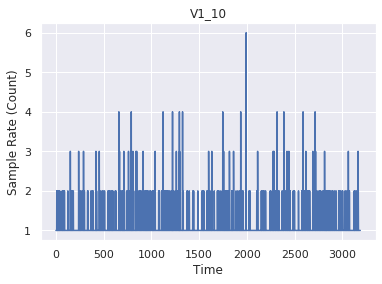

V1_11
Mean: 1.12, Standard deviation: 0.38


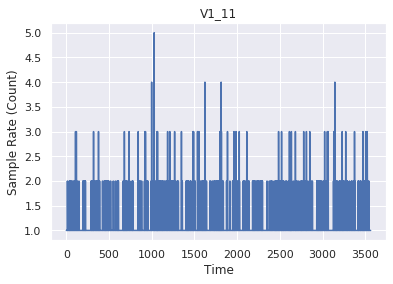

V1_12
Mean: 1.16, Standard deviation: 0.45


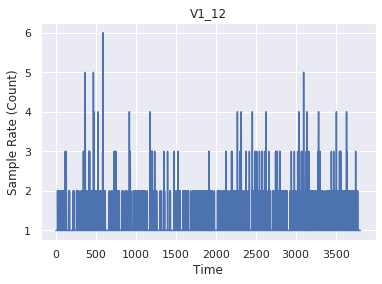

V1_13
Mean: 1.14, Standard deviation: 0.44


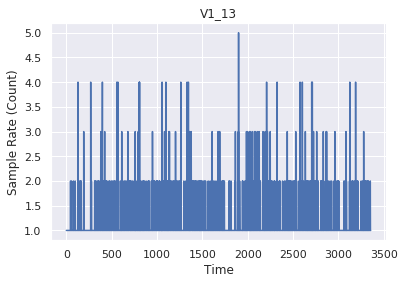

V1_14
Mean: 1.12, Standard deviation: 0.38


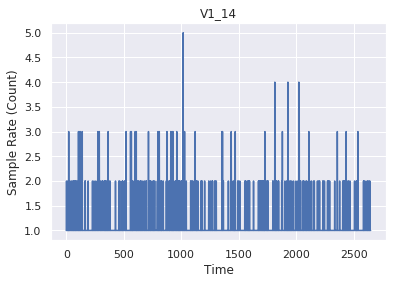

V1_18
Mean: 1.14, Standard deviation: 0.42


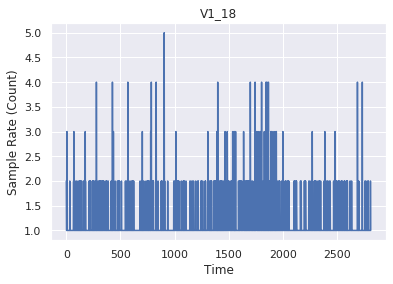

V1_19
Mean: 1.11, Standard deviation: 0.39


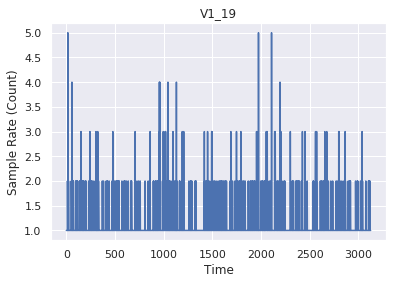

V1_20
Mean: 1.13, Standard deviation: 0.40


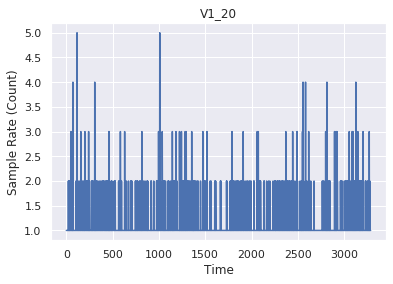

V1_21
Mean: 1.12, Standard deviation: 0.39


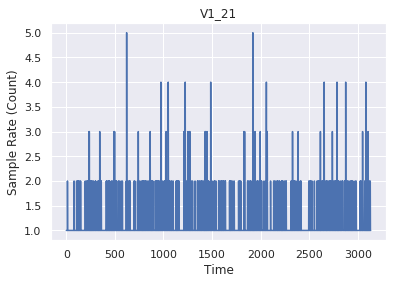

V1_22
Mean: 1.09, Standard deviation: 0.32


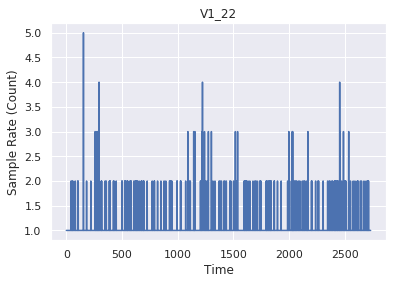

V1_23
Mean: 1.17, Standard deviation: 0.47


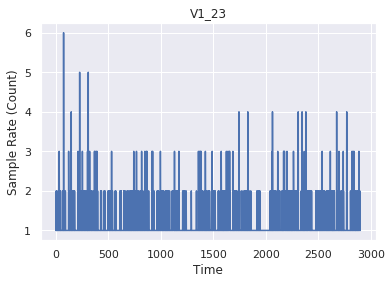

V1_24
Mean: 1.11, Standard deviation: 0.36


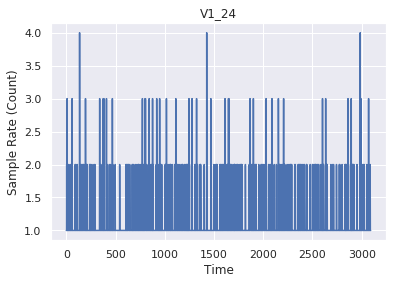

V1_26
Mean: 1.13, Standard deviation: 0.40


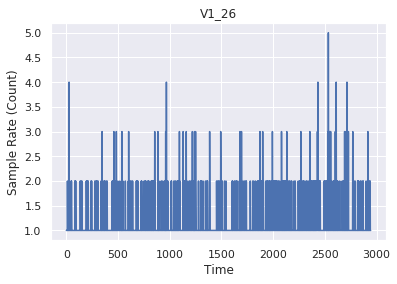

V1_27
Mean: 1.12, Standard deviation: 0.40


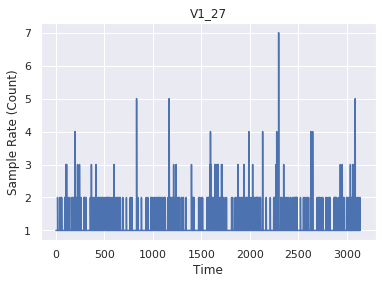

V1_28
Mean: 1.11, Standard deviation: 0.35


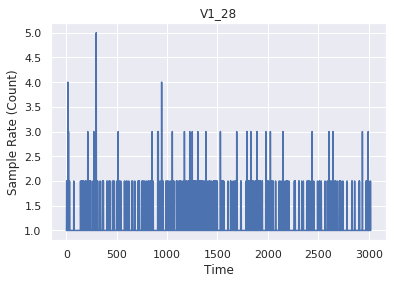

V1_29
Mean: 1.09, Standard deviation: 0.34


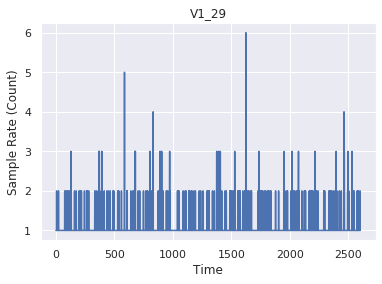

V1_30
Mean: 1.13, Standard deviation: 0.41


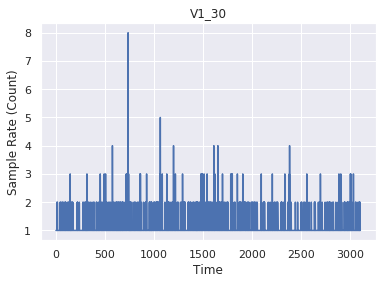

V1_31
Mean: 1.11, Standard deviation: 0.36


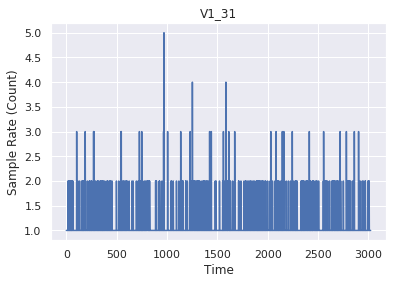

V1_32
Mean: 1.11, Standard deviation: 0.36


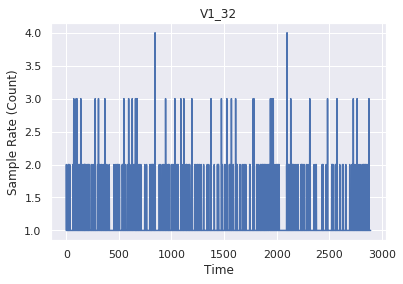

V1_8
Mean: 1.11, Standard deviation: 0.38


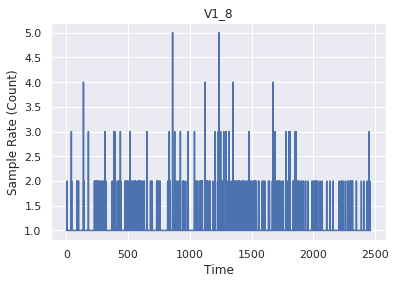

V1_9
Mean: 1.10, Standard deviation: 0.35


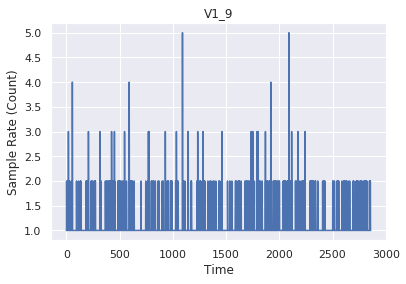

In [9]:
for loc in sorted(locations):
    plot(data_count, loc)

## Group By Data Sample Rate at each Location

In [10]:
data_grouped = data.set_index('time').groupby(["location", pd.Grouper(freq="1s")]).mean().reset_index()
data_grouped

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,2020-01-09 08:29:42,-71.0,-76.000000,NaN,-66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-62.50,NaN,NaN,NaN,NaN
1,V1_10,2020-01-09 08:29:43,-70.5,-75.333333,NaN,-66.833333,-84.000000,NaN,NaN,-78.000000,NaN,-81.500000,-84.0,-68.0,-64.50,-72.000000,-74.000000,NaN,-69.0
2,V1_10,2020-01-09 08:29:44,NaN,-76.000000,NaN,-69.000000,NaN,NaN,NaN,-76.000000,NaN,NaN,NaN,-69.0,-64.20,-72.571429,-72.500000,NaN,NaN
3,V1_10,2020-01-09 08:29:45,-70.0,-76.000000,NaN,-64.000000,-72.666667,NaN,-77.0,NaN,-97.0,-78.000000,NaN,-68.0,-63.75,NaN,-74.333333,-94.0,-71.0
4,V1_10,2020-01-09 08:29:46,-70.0,-77.000000,NaN,-64.000000,NaN,NaN,NaN,-71.000000,NaN,-80.000000,-89.0,-68.0,-65.50,-71.333333,NaN,NaN,-68.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,V1_9,2020-01-09 08:37:21,-73.0,-91.000000,NaN,-68.500000,NaN,NaN,NaN,-57.500000,NaN,-83.333333,NaN,NaN,-76.50,-75.000000,-78.500000,-94.0,-67.0
3806,V1_9,2020-01-09 08:37:22,NaN,-82.000000,NaN,-69.500000,-85.000000,NaN,NaN,NaN,NaN,-84.000000,NaN,-72.5,-77.00,-73.500000,-79.000000,NaN,NaN
3807,V1_9,2020-01-09 08:37:23,-72.0,-85.000000,-81.0,-68.666667,NaN,NaN,-80.0,-65.500000,NaN,NaN,NaN,NaN,-77.00,-71.500000,NaN,NaN,NaN
3808,V1_9,2020-01-09 08:37:24,-79.0,-90.000000,NaN,-78.000000,NaN,-89.0,-87.0,-59.666667,NaN,-82.000000,NaN,-72.0,-75.00,-68.000000,-83.000000,NaN,-67.0


In [11]:
data_grouped_count = data_grouped.set_index('location')[scanners].count(axis=1)

V1_24
Mean: 8.17, Standard deviation: 2.28


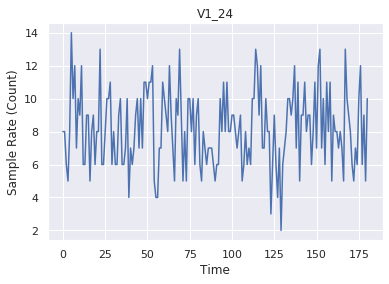

V1_32
Mean: 8.17, Standard deviation: 2.44


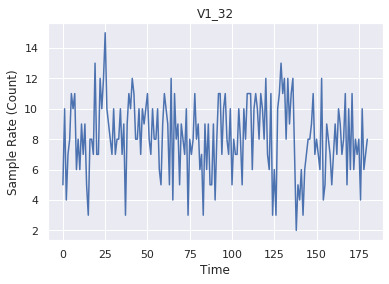

V1_23
Mean: 9.19, Standard deviation: 2.36


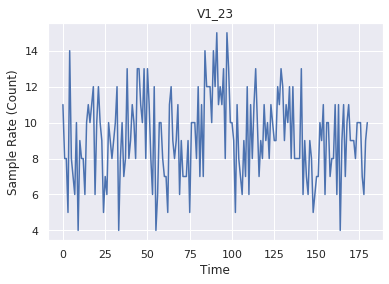

V1_22
Mean: 8.28, Standard deviation: 2.27


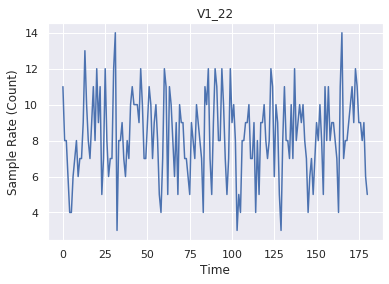

V1_14
Mean: 9.14, Standard deviation: 2.66


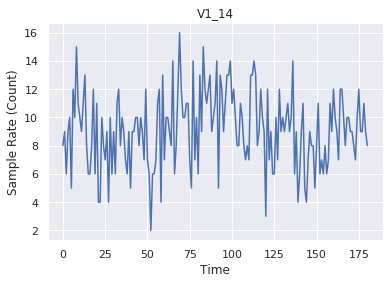

V1_13
Mean: 10.98, Standard deviation: 2.54


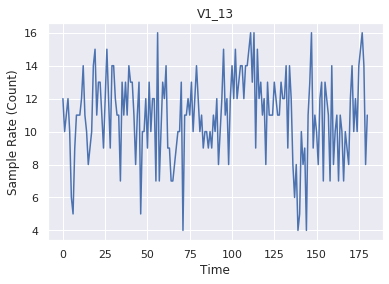

V1_12
Mean: 11.79, Standard deviation: 2.39


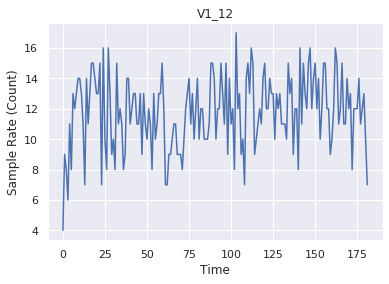

V1_11
Mean: 10.84, Standard deviation: 2.19


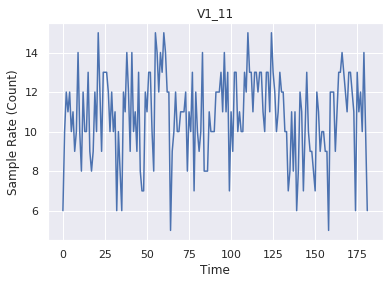

V1_10
Mean: 10.36, Standard deviation: 2.50


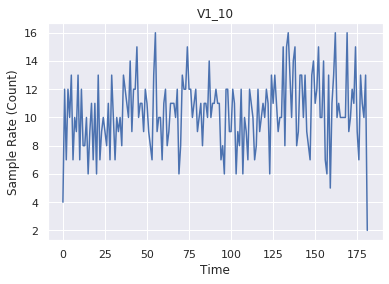

V1_9
Mean: 9.54, Standard deviation: 2.37


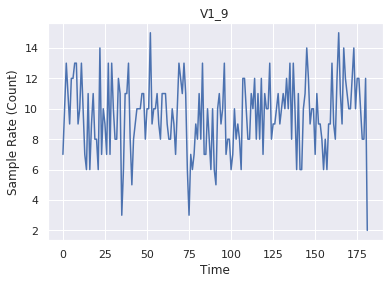

V1_8
Mean: 8.29, Standard deviation: 2.10


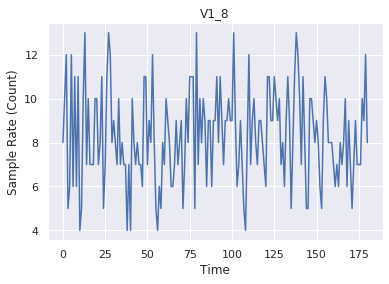

V1_18
Mean: 9.64, Standard deviation: 2.29


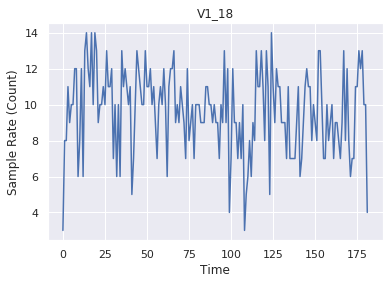

V1_26
Mean: 9.86, Standard deviation: 2.60


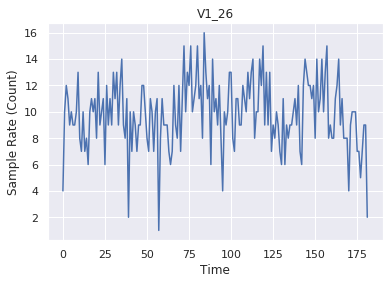

V1_27
Mean: 10.53, Standard deviation: 2.40


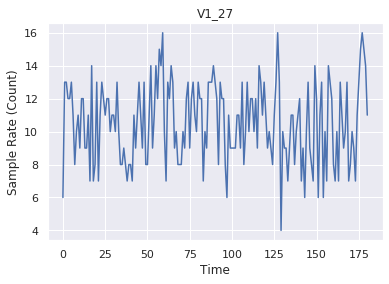

V1_19
Mean: 10.70, Standard deviation: 2.51


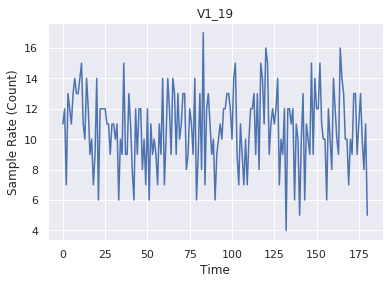

V1_20
Mean: 11.10, Standard deviation: 2.49


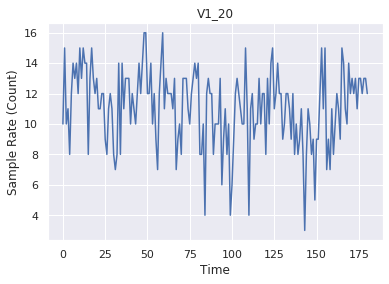

V1_28
Mean: 10.55, Standard deviation: 2.42


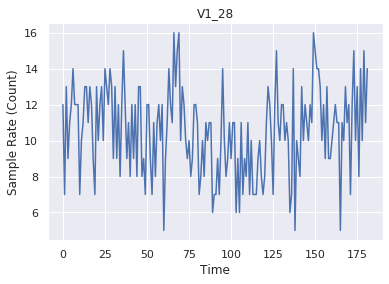

V1_29
Mean: 9.47, Standard deviation: 2.90


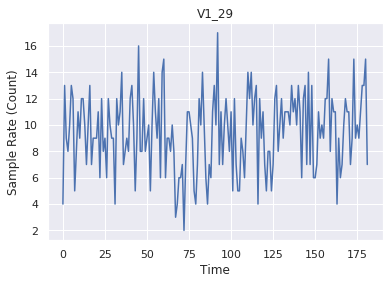

V1_21
Mean: 10.77, Standard deviation: 2.56


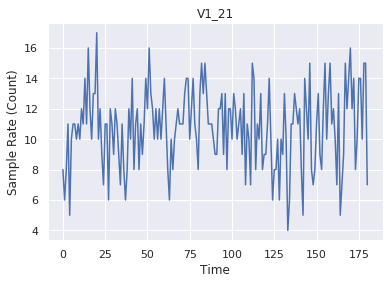

V1_31
Mean: 8.99, Standard deviation: 2.19


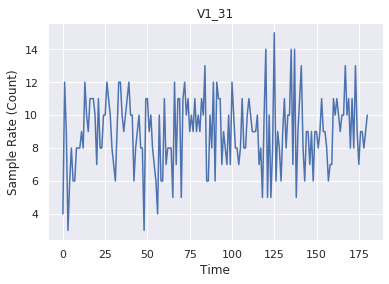

V1_30
Mean: 9.48, Standard deviation: 2.37


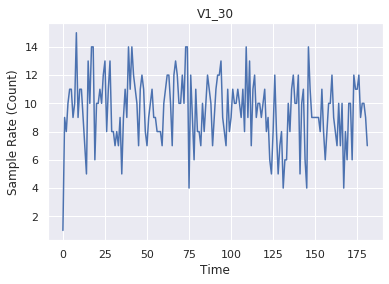

In [12]:
for loc in locations:
    plot(data_grouped_count, loc)

## Rolling Data Sample Rate at each Location

In [13]:
data_rolled = data.groupby("location").rolling(15, min_periods=1).mean().reset_index()
data_rolled

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,24997,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_10,24998,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.0,NaN,NaN,NaN,NaN
2,V1_10,24999,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-62.5,NaN,NaN,NaN,NaN
3,V1_10,25000,-72.0,-76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-62.5,NaN,NaN,NaN,NaN
4,V1_10,25001,-72.0,-76.0,NaN,-66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-62.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63702,V1_9,31039,-75.5,-90.0,-81.0,-78.0,NaN,-91.0,-87.0,-61.50,NaN,-82.0,NaN,NaN,-75.0,-68.0,-84.0,NaN,-67.0
63703,V1_9,31040,-75.5,-90.0,NaN,-78.0,NaN,-89.0,-87.0,-61.50,NaN,-82.0,NaN,-72.0,-75.0,-68.0,-84.0,NaN,-67.0
63704,V1_9,31041,-79.0,-90.0,NaN,-78.0,NaN,-89.0,-87.0,-61.50,NaN,-82.0,NaN,-72.0,-75.0,-68.0,-83.0,NaN,-67.0
63705,V1_9,31042,-79.0,-90.0,NaN,-78.0,NaN,-89.0,-87.0,-59.25,NaN,-82.0,NaN,-72.0,-75.0,-68.0,-83.0,NaN,-67.0


In [14]:
data_rolled_count = data_rolled.set_index('location')[scanners].count(axis=1)

V1_24
Mean: 7.89, Standard deviation: 1.55


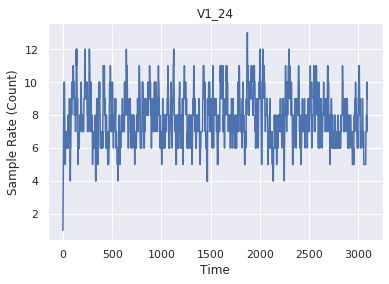

V1_32
Mean: 8.33, Standard deviation: 1.56


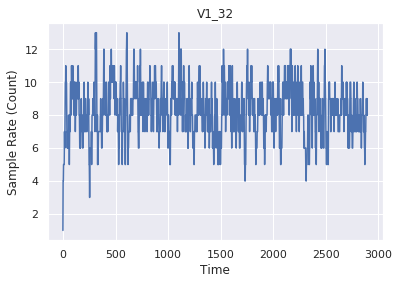

V1_23
Mean: 9.27, Standard deviation: 1.66


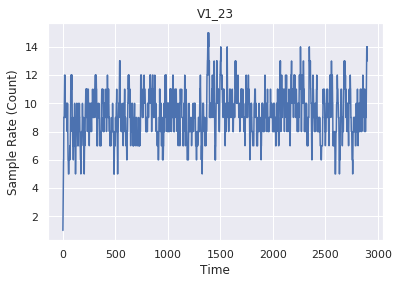

V1_22
Mean: 8.68, Standard deviation: 1.42


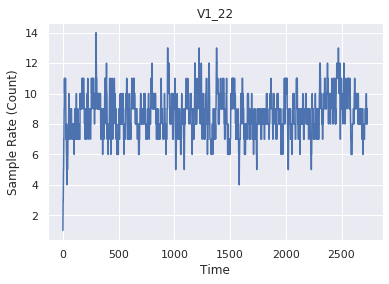

V1_14
Mean: 9.82, Standard deviation: 1.56


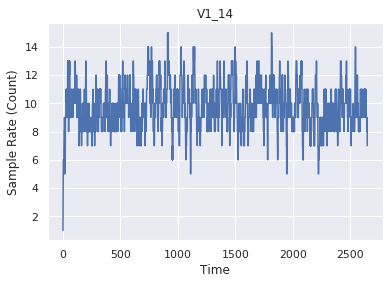

V1_13
Mean: 10.40, Standard deviation: 1.49


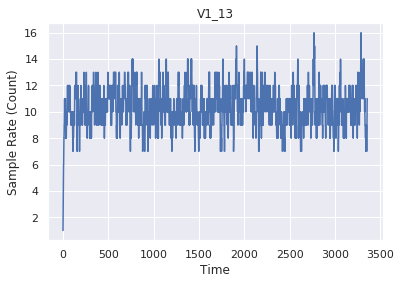

V1_12
Mean: 10.55, Standard deviation: 1.55


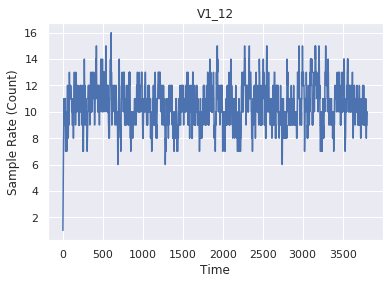

V1_11
Mean: 9.88, Standard deviation: 1.44


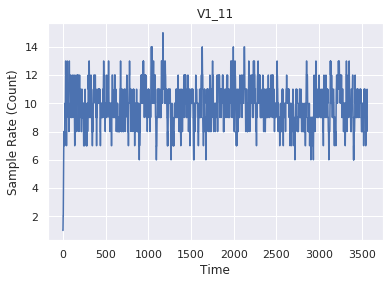

V1_10
Mean: 9.84, Standard deviation: 1.58


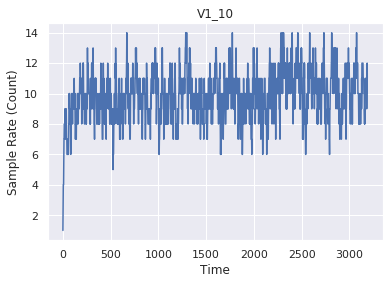

V1_9
Mean: 9.66, Standard deviation: 1.42


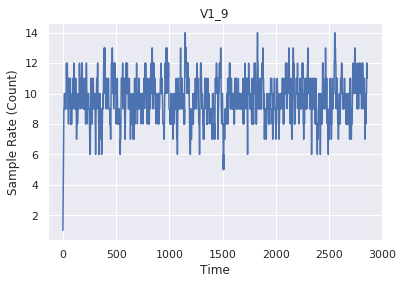

V1_8
Mean: 9.06, Standard deviation: 1.36


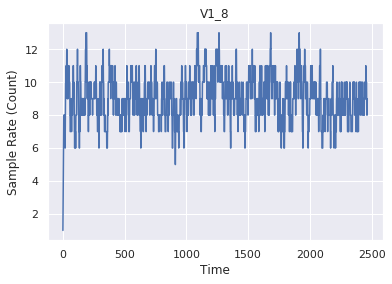

V1_18
Mean: 9.86, Standard deviation: 1.58


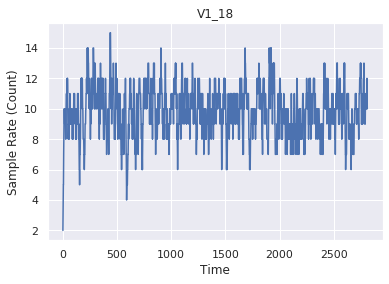

V1_26
Mean: 9.91, Standard deviation: 1.50


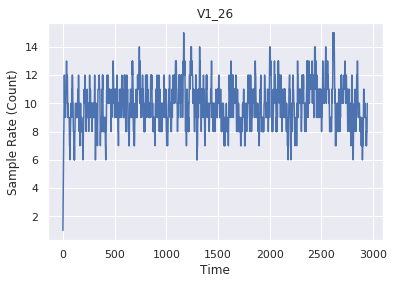

V1_27
Mean: 10.18, Standard deviation: 1.59


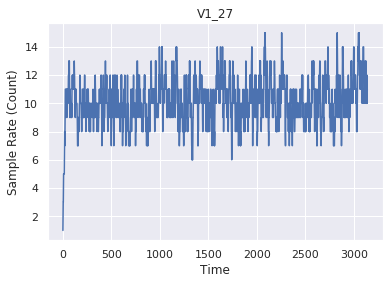

V1_19
Mean: 10.40, Standard deviation: 1.48


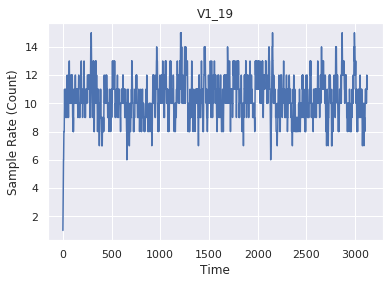

V1_20
Mean: 10.65, Standard deviation: 1.44


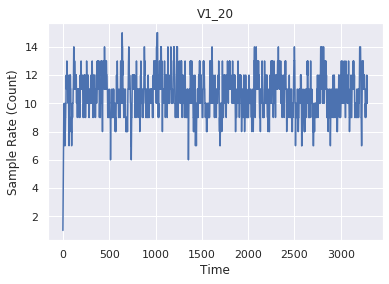

V1_28
Mean: 10.44, Standard deviation: 1.44


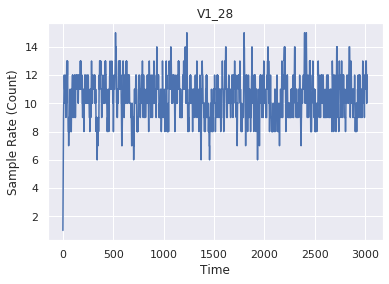

V1_29
Mean: 10.22, Standard deviation: 1.52


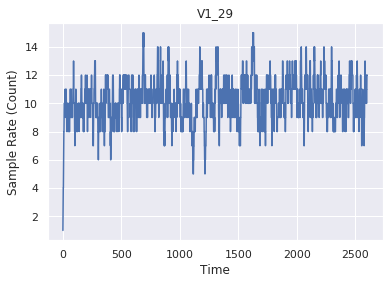

V1_21
Mean: 10.33, Standard deviation: 1.51


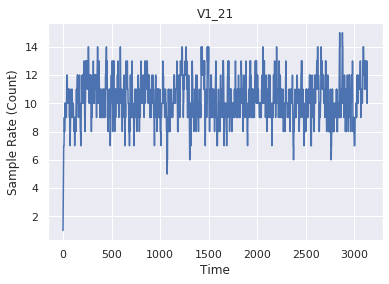

V1_31
Mean: 8.77, Standard deviation: 1.50


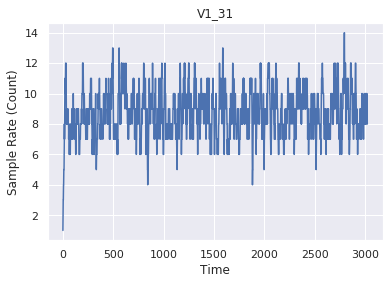

V1_30
Mean: 9.26, Standard deviation: 1.65


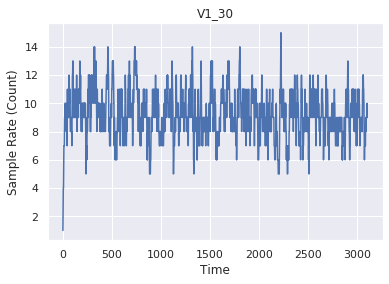

In [15]:
for loc in locations:
    plot(data_rolled_count, loc)